- http://keunwoochoi.blogspot.com/2016/03/2.html
- http://www.rex-ai.info/docs/AI_Example_CNN_speech_recognize
- https://www.youtube.com/watch?v=oltGIc4uo5c
- https://youdaeng-com.tistory.com/5
- https://quokkas.tistory.com/37 : early stopping
- https://continuous-development.tistory.com/166 : stratified kfold
- https://deep-learning-study.tistory.com/476 fiter 시각화
- https://wyatt37.tistory.com/10 : random over sampling

In [2]:
import wandb

#default param
run_config = dict(
    # spectrum
    sample_rate=50000,
    n_fft=1250,
    n_mels=128,
    hop_length=300,
    win_length=1250,
    f_max=25000,
    
    # training
    batch_size=32,
    
    # data
    fold=1,
)


In [2]:



sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "HyperParam for mel",
    "method": "grid",
    "parameters": {
      "n_mels" :{
           "values":[32,64,96,128,160,192]
       },
      "n_fft": {
            "values": [1024,2048,3072,4096,8192]
        },
      "win_length": {
            "values": [300,350,400,450,500,1024,1524,2048]
        },
       "hop_length": {
          "values": [50,100,200,400,600,800]
      },
       "f_max":{
          "values":[10000,12000,20000,25000,40000,60000]
      },
      "fold":{
          "values" : [1,]
      }
    }
}

sweep_id = wandb.sweep(sweep_config)



Create sweep with ID: fil8fxo6
Sweep URL: https://wandb.ai/bub3690/uncategorized/sweeps/fil8fxo6


In [6]:
# n_mels

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "n_mel",
  "method": "grid",
  "parameters": {
      "n_mels" :{
           "values":[32,64,96,128,160,192]
       },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep2",entity="bub3690")


Create sweep with ID: na16x86y
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep2/sweeps/na16x86y


In [1]:
8192*2

16384

In [3]:
# n_fft

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "n_fft",
  "method": "grid",
  "parameters": {
      "n_fft": {
            "values": [2048,3072,4096,8192,16384]
        },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep2",entity="bub3690")


Create sweep with ID: a9z2vym9
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep/sweeps/a9z2vym9


In [5]:
# win_length

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "win_length",
  "method": "grid",
  "parameters": {
      "win_length": {
            "values": [500,1024,1250,1524,2048,4096]
        },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep2",entity="bub3690")


Create sweep with ID: hy9bi35f
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep/sweeps/hy9bi35f


In [2]:
# hop_length

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "hop_length",
  "method": "grid",
  "parameters": {
       "hop_length": {
          "values": [50,100,200,300,400,500,600]
      },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep2",entity="bub3690")


Create sweep with ID: vbxfcusk
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep/sweeps/vbxfcusk


In [2]:
# f_max

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "f_max",
  "method": "grid",
  "parameters": {
       "f_max":{
          "values":[10000,12000,20000,25000,40000,60000]
      },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep2",entity="bub3690")


Create sweep with ID: pdb3pd9z
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep/sweeps/pdb3pd9z


In [2]:
# batch_size

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "batch_size",
  "method": "grid",
  "parameters": {
      "batch_size" :{
           "values":[8,16,32,64,128]
       },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep2",entity="bub3690")


Create sweep with ID: j9mfv8ql
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep/sweeps/j9mfv8ql


In [39]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
from torchvision import transforms, datasets
import cv2
from torchvision import transforms, datasets
import pandas as pd
import os
from glob import glob
import torchvision.models as models
import sys

p = os.path.abspath('../..') # 상위 폴더를 사용하기 위해서.
sys.path.insert(1, p)
from pytorchtools.pytorchtools import EarlyStopping # 상위 폴더에 추가된 모듈.


if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
#DEVICE = torch.device('cpu')
print('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)

Using Pytorch version :  1.10.2  Device :  cuda


# SVD 문장 데이터에서 Feature 추출
- mfcc

In [40]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=16000
win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.

# 데이터 나누기 - Stratified KFold

- pathology : 1194 / healthy : 634 / 총 1828
- k = 5

## 1. test/ train 나누기


In [41]:
#1. train, test 나누기

import os
from glob import glob
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split # train , test 분리에 사용.


pathology = glob('D:/project/voice_pathology_ai/voice_data/organics/pathology/phrase/*.wav')
healthy = glob('D:/project/voice_pathology_ai/voice_data/organics/healthy/phrase/*.wav')
print("Pathology : ",len(pathology))
print("Healthy: ",len(healthy))

pathology= [ path.split("\\")[-1] for path in pathology] # path 데이터 변환.
healthy= [ path.split("\\")[-1] for path in healthy] # path 데이터 변환.
 # path 데이터 변환 #외부데이터로 가져오기위해서, 번호만 남긴다

    
X = pathology+healthy # path 데이터 합
print("총 데이터수 : ",len(X))
Y = [] # 라벨
for idx,x in enumerate(X):
    if idx<597:
        Y.append("pathology")
    else:
        Y.append("healthy")

X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=456)
#stratify를 넣어서, test에도 라벨별 잘 분류되게 한다.

print("---")
print("훈련 셋 : ",len(Y),Counter(Y))
print("테스트 셋 : ",len(Y_test),Counter(Y_test))
print("---")

Pathology :  597
Healthy:  634
총 데이터수 :  1231
---
훈련 셋 :  984 Counter({'healthy': 507, 'pathology': 477})
테스트 셋 :  247 Counter({'healthy': 127, 'pathology': 120})
---


## 2. stratified k-fold

In [42]:
#1. train, test 나누기
#stratified kfold
import os
import random #데이터 shuffle 사용
from glob import glob
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from collections import Counter



skf_iris = StratifiedKFold(n_splits=5,shuffle=True,random_state=456)
cnt_iter = 0

X_train_list = [] #데이터 셋 보관
Y_train_list = []

X_valid_list = []
Y_valid_list = []

for train_idx, test_idx in skf_iris.split(X,Y):
    
    #split으로 반환된 인덱스를 이용하여, 학습 검증용 테스트 데이터 추출
    cnt_iter += 1
    X_train, X_valid = [X[idx] for idx in train_idx.tolist() ], [X[idx] for idx in test_idx.tolist() ]
    Y_train, Y_valid = [Y[idx] for idx in train_idx.tolist() ], [Y[idx] for idx in test_idx.tolist() ]
    
    X_train_list.append(X_train)
    X_valid_list.append(X_valid)
    
    Y_train_list.append(Y_train)
    Y_valid_list.append(Y_valid)
    
    
    #학습 및 예측
    
    label_train = Y_train
    label_test = Y_valid
    unique_train, train_counts = np.unique(label_train, return_counts = True)
    unique_test, test_counts = np.unique(label_test, return_counts = True)
    
    uniq_cnt_train = dict(zip(unique_train, train_counts))
    uniq_cnt_test = dict(zip(unique_test, test_counts))
    
    
    
    print('교차 검증 : {}'.format(cnt_iter))
    print('학습 레이블 데이터 분포 : \n', uniq_cnt_train)
    print('검증 레이블 데이터 분포 : \n', uniq_cnt_test,'\n')



교차 검증 : 1
학습 레이블 데이터 분포 : 
 {'healthy': 406, 'pathology': 381}
검증 레이블 데이터 분포 : 
 {'healthy': 101, 'pathology': 96} 

교차 검증 : 2
학습 레이블 데이터 분포 : 
 {'healthy': 406, 'pathology': 381}
검증 레이블 데이터 분포 : 
 {'healthy': 101, 'pathology': 96} 

교차 검증 : 3
학습 레이블 데이터 분포 : 
 {'healthy': 405, 'pathology': 382}
검증 레이블 데이터 분포 : 
 {'healthy': 102, 'pathology': 95} 

교차 검증 : 4
학습 레이블 데이터 분포 : 
 {'healthy': 405, 'pathology': 382}
검증 레이블 데이터 분포 : 
 {'healthy': 102, 'pathology': 95} 

교차 검증 : 5
학습 레이블 데이터 분포 : 
 {'healthy': 406, 'pathology': 382}
검증 레이블 데이터 분포 : 
 {'healthy': 101, 'pathology': 95} 



## 3. random over sampling

In [43]:
#2. random over sampling
for i in range(5):
    X_temp = np.array(X_train_list[i]).reshape(-1,1)#각 데이터를 다 행으로 넣음. (1194,1)
    #Y = np.array(Y)
    ros = RandomOverSampler(random_state = 123)
    X_res,Y_res = ros.fit_resample(X_temp,Y_train_list[i])
    
    print("\n fold{} ".format(i))
    print('before dataset shape {}'.format(Counter(Y_train_list[i])) )
    print('Resampled dataset shape {}'.format(Counter(Y_res)) )   
    
    #원래대로 돌리기
    X_res=X_res.reshape(1, -1)
    X_train_list[i]=X_res[0].tolist()
    Y_train_list[i]=Y_res





 fold0 
before dataset shape Counter({'healthy': 406, 'pathology': 381})
Resampled dataset shape Counter({'pathology': 406, 'healthy': 406})

 fold1 
before dataset shape Counter({'healthy': 406, 'pathology': 381})
Resampled dataset shape Counter({'healthy': 406, 'pathology': 406})

 fold2 
before dataset shape Counter({'healthy': 405, 'pathology': 382})
Resampled dataset shape Counter({'pathology': 405, 'healthy': 405})

 fold3 
before dataset shape Counter({'healthy': 405, 'pathology': 382})
Resampled dataset shape Counter({'pathology': 405, 'healthy': 405})

 fold4 
before dataset shape Counter({'healthy': 406, 'pathology': 382})
Resampled dataset shape Counter({'pathology': 406, 'healthy': 406})


In [54]:
import pickle

 
#load
with open("D:/project/voice_pathology_ai/voice_data/organics/phrase_sig_dict_50000.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)

    

# 데이터 정의
- 추가적으로 데이터의 크기를 맞춰주기 위해 3초로 padding 및 truncate 실시 https://sequencedata.tistory.com/25 FixAudioLength
- 논문에서는 400frame으로 설정.(여기서는 500frame)
- 전처리 방법 결정.


In [55]:
from torch.utils.data import Dataset, DataLoader

classes = ["pathology","healthy"]
sr=50000
#win_length =  np.int64(16000/40) # 400
#n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding. 세로 길이
#hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.



class svd_dataset(Dataset):
    def __init__(self,data_path_list,classes,data_num,training,mel_params,transform=None,normalize=None):
        #클래스에서 사용할 인자를 받아 인스턴스 변수로 저장하는 일을 한다.
        #예를들면, 이미지의 경로 리스트를 저장하는 일을 하게 된다.
        
        #data_num : k 개 데이터 셋 중 어떤것을 쓸지
        #test인지 아닌지.
        
        self.path_list = data_path_list[data_num]
        self.data_num = data_num
        self.training = training
        self.label = svd_dataset.get_label(self.path_list,training,data_num)
        self.classes = classes
        self.transform = transform
        self.normalize = normalize
        
        # sweep params
        self.mel_params = mel_params
        # hop_length , win_length , n_mels , n_fft , f_max , batch_size
        
        
    
    @classmethod
    def get_label(cls,data_path_list,training,data_num):
        label_list=[]
        
        if training:
            for idx,x in enumerate(data_path_list):
                label_list.append(Y_train_list[data_num][idx])
        else:
            for idx,x in enumerate(data_path_list):
                label_list.append(Y_valid_list[data_num][idx])
        #print(label_list)
        return label_list
    
    
    def __len__(self):
        return len(self.path_list)
        #데이터 셋의 길이를 정수로 반환한다.     
    
       
    def __getitem__(self, idx):
        """
        1. path를 받아서, 소리에서 mfcc를 추출
        2. mfcc를 224프레임으로 패딩.
        3. resnet에 사용되기 위해 3채널로 복사(rgb 처럼)
        4. 0~1 정규화
        
        """
        sig = phrase_dict[self.path_list[idx]] # 16000hz 실시
        length = 60000 #300 padding을 위한 파라미터 (하이퍼 파라미터로인해 사이즈는 계속 바뀐다.)
        pad1d = lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        
        sig = pad1d(sig,length)        
        
        ###signal norm
        sig = (sig-sig.mean())/sig.std()
        ###

        mel_feature = librosa.feature.melspectrogram(y=sig,
                                                     sr=sr,
                                                     # hyp param
                                                     n_mels = self.mel_params["n_mels"],
                                                     n_fft = self.mel_params["n_fft"],
                                                     win_length = self.mel_params["win_length"],
                                                     hop_length = self.mel_params["hop_length"],
                                                     fmax = self.mel_params["f_max"]
                                                    )
        mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
        #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm
        
        #pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
        #mel_feature = pad2d(mel_feature, length)
        
        
        
        if self.transform:
            #print('transform')
            mel_feature=self.transform(mel_feature).type(torch.float32)# 데이터 0~1 정규화
            mel_feature=torch.stack([mel_feature,mel_feature,mel_feature])# 3채널로 복사.
            mel_feature = mel_feature.squeeze(dim=1)
            
            # global normalize
            if self.normalize:
                mel_feature=self.normalize(mel_feature)            
        else:
            #print("else")
            mel_feature = torch.from_numpy(mel_feature).type(torch.float32)
            mel_feature=mel_feature.unsqueeze(0)#cnn 사용위해서 추가
            #MFCCs = MFCCs.permute(2, 0, 1)
        return mel_feature, self.classes.index(self.label[idx])
    

In [56]:

# test set 제작을 위한 class
class svd_test_set(Dataset):
    def __init__(self,data_path_list,classes,mel_params,transform=None,normalize=None):
        #클래스에서 사용할 인자를 받아 인스턴스 변수로 저장하는 일을 한다.
        #예를들면, 이미지의 경로 리스트를 저장하는 일을 하게 된다.
        
        #data_num : k 개 데이터 셋 중 어떤것을 쓸지
        #test인지 아닌지.
        
        self.path_list = data_path_list
        self.label = svd_test_set.get_label(self.path_list)
        self.classes=classes
        self.transform=transform
        self.normalize=normalize
        
        # sweep params
        self.mel_params = mel_params
        # hop_length , win_length , n_mels , n_fft , f_max , batch_size        
        
    
    @classmethod
    def get_label(cls,data_path_list):
        label_list=[]
        
        for idx,x in enumerate(data_path_list):
            label_list.append(Y_test[idx])
        #print(label_list)
        return label_list
    
    def __len__(self):
        return len(self.path_list)
        #데이터 셋의 길이를 정수로 반환한다. 
        
    def __getitem__(self, idx):
        """
        1. path를 받아서, 소리에서 mfcc를 추출
        2. mfcc를 224프레임으로 패딩.
        3. resnet에 사용되기 위해 3채널로 복사(rgb 처럼)
        4. 0~1 정규화
        
        """
        sig= phrase_dict[self.path_list[idx]] # 16000hz 실시
        length=60000 #300 padding을 위한 파라미터
        pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        
        sig = pad1d(sig,length)        
        
        ###signal norm
        sig = (sig-sig.mean())/sig.std()
        ###        
        
        mel_feature = librosa.feature.melspectrogram(y=sig,
                                                     sr=sr,
                                                     # hyp param
                                                     n_mels = self.mel_params["n_mels"],
                                                     n_fft = self.mel_params["n_fft"],
                                                     win_length = self.mel_params["win_length"],
                                                     hop_length = self.mel_params["hop_length"],
                                                     fmax = self.mel_params["f_max"]
                                                    )
        mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
        
        
        
        
        if self.transform:
            #print('transform')
            mel_feature=self.transform(mel_feature).type(torch.float32)# 데이터 0~1 정규화
            mel_feature=torch.stack([mel_feature,mel_feature,mel_feature])# 3채널로 복사.
            mel_feature = mel_feature.squeeze(dim=1)
            
            # global normalize
            if self.normalize:
                mel_feature=self.normalize(mel_feature)    
        else:
            #print("else")
            mel_feature = torch.from_numpy(mel_feature).type(torch.float32)
            mel_feature=mel_feature.unsqueeze(0)#cnn 사용위해서 추가
            #MFCCs = MFCCs.permute(2, 0, 1)
        return mel_feature, self.classes.index(self.label[idx])
    
    

# 데이터 로더

In [57]:
#3. 하이퍼 파라미터
BATCH_SIZE =  32 #한 배치당 32개 음성데이터
EPOCHS = 40 # 전체 데이터 셋을 50번 반복
lr=0.0001
augment_kind="no"


In [58]:
#DATA LOADER 함수가 BATCH_size 단위로 분리해 지정.

#확인을 위해 데이터셋 하나만 확인


train_loader = torch.utils.data.DataLoader(dataset = 
                                           svd_dataset(
                                               X_train_list,
                                               classes,
                                               transform = transforms.ToTensor(),#이걸 composed로 고쳐서 전처리 하도록 수정. to tensor는 -데이터는 노멀라이즈못함.
                                               #normalize=transforms.Normalize((-56.4917, -56.4917,-56.4917), (17.9446,17.9446,17.9446)),
                                               mel_params = dict(
                                                     n_mels = run_config["n_mels"],
                                                     n_fft = run_config["n_fft"],
                                                     win_length = run_config["win_length"],
                                                     hop_length = run_config["hop_length"],
                                                     f_max = run_config["f_max"]
                                               ),
                                               data_num=run_config["fold"],
                                               training=True
                                           ),
                                           batch_size = run_config["batch_size"],
                                           shuffle = True,
                                           ) # 순서가 암기되는것을 막기위해.

validation_loader = torch.utils.data.DataLoader(dataset = 
                                           svd_dataset(
                                               X_valid_list,
                                               classes,
                                               transform = transforms.ToTensor(),
                                               mel_params = dict(
                                                     n_mels = run_config["n_mels"],
                                                     n_fft = run_config["n_fft"],
                                                     win_length = run_config["win_length"],
                                                     hop_length = run_config["hop_length"],
                                                     f_max = run_config["f_max"]
                                               ),                      
                                               #normalize=transforms.Normalize((-56.4917, -56.4917,-56.4917), (17.9446,17.9446,17.9446)),                                               
                                               data_num=run_config["fold"],
                                               training=False
                                           ),
                                           batch_size = run_config["batch_size"],
                                           shuffle = True,) 



In [59]:
# 테스트 데이터 로더.

test_loader = torch.utils.data.DataLoader(dataset = 
                                               svd_test_set(
                                                   X_test,
                                                   classes,
                                                   mel_params = dict(
                                                         n_mels = run_config["n_mels"],
                                                         n_fft = run_config["n_fft"],
                                                         win_length = run_config["win_length"],
                                                         hop_length = run_config["hop_length"],
                                                         f_max = run_config["f_max"]
                                               ),                                            
                                                   #normalize=transforms.Normalize((-56.4917, -56.4917,-56.4917), (17.9446,17.9446,17.9446)),                                                   
                                                   transform = transforms.ToTensor(),
                                               ),
                                               batch_size = run_config["batch_size"],
                                               shuffle = True,) 

# 데이터 확인

In [60]:

sr=50000
win_length =  run_config["win_length"] # 400
n_fft= run_config["n_fft"] # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding. 세로 길이
hop_length=run_config["hop_length"] #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


X_train :  torch.Size([32, 3, 128, 601]) type: torch.FloatTensor
Y_train :  torch.Size([32]) type: torch.LongTensor
tensor(0)


Text(0.5, 1.0, 'MEL Spectrogram (dB)')

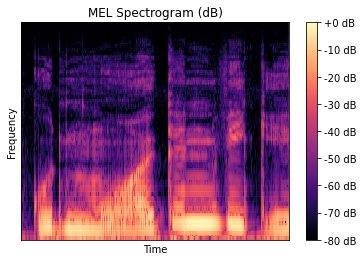

In [61]:
# 4. 데이터 확인하기
for (X_train,Y_train) in train_loader:
    print("X_train : ",X_train.size(),'type:',X_train.type())
    print("Y_train : ",Y_train.size(),'type:',Y_train.type())
    break
    
print(Y_train[0])
librosa.display.specshow(X_train[0][0].numpy(), sr=sr, hop_length=run_config["batch_size"])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("MEL Spectrogram (dB)")
#batch: 32 / 3채널 / frame수: 500  /  feature수: 13

X_valid :  torch.Size([32, 3, 128, 601]) type: torch.FloatTensor
Y_valid :  torch.Size([32]) type: torch.LongTensor
tensor(1)


Text(0.5, 1.0, 'MEL Spectrogram (dB)')

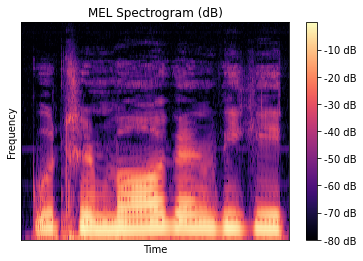

In [64]:
#valiation set 확인
for (X_valid,Y_valid) in validation_loader:
    print("X_valid : ",X_valid.size(),'type:',X_valid.type())
    print("Y_valid : ",Y_valid.size(),'type:',Y_valid.type())
    break

print(Y_valid[0])
librosa.display.specshow(X_valid[0][0].numpy(), sr=sr, hop_length=run_config["batch_size"])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("MEL Spectrogram (dB)")

#batch: 32 / 3채널 / frame수: 500  /  feature수: 13

X_valid :  torch.Size([32, 3, 128, 601]) type: torch.FloatTensor
Y_valid :  torch.Size([32]) type: torch.LongTensor
tensor(1)


Text(0.5, 1.0, 'MEL Spectrogram (dB)')

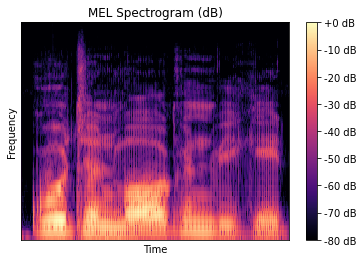

In [65]:
#valiation set 확인
for (test_data,test_label) in validation_loader:
    print("X_valid : ",test_data.size(),'type:',test_data.type())
    print("Y_valid : ",test_label.size(),'type:',test_label.type())
    break

print(Y_valid[0])
librosa.display.specshow(test_data[0][0].numpy(), sr=sr, hop_length=run_config["batch_size"])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("MEL Spectrogram (dB)")

#batch: 32 / 3채널 / frame수: 500  /  feature수: 13

# RESNET

In [66]:
# 모델 
# pretrained


def model_initialize():
    model = models.resnet18(pretrained=True).cuda()
    model.ftrs = model.fc.in_features # in_features : fully connected의 입력수.
    num_ftrs = model.fc.in_features
    
    model.fc = nn.Sequential(nn.Linear(num_ftrs, 64),
                             nn.BatchNorm1d(64),
                             nn.ReLU(),
                             nn.Dropout(p=0.5),
                             nn.Linear(64,50),
                             nn.BatchNorm1d(50),
                             nn.ReLU(),
                             nn.Dropout(p=0.5),
                             nn.Linear(50,2)
                            )

    model = model.cuda()
    return model
model=model_initialize()


In [67]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [68]:
# get the model summary
from torchsummary import summary
#summary(model, input_size=(3, 128, 300), device=DEVICE.type)

In [69]:
#8. 학습
def train(model,train_loader,optimizer, log_interval):
    model.train()    
    correct = 0
    train_loss = 0
    for batch_idx,(image,label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        #데이터들 장비에 할당
        optimizer.zero_grad() # device 에 저장된 gradient 제거
        output = model(image) # model로 output을 계산
        loss = criterion(output, label) #loss 계산
        train_loss += loss.item()
        prediction = output.max(1,keepdim=True)[1] # 가장 확률이 높은 class 1개를 가져온다.그리고 인덱스만
        correct += prediction.eq(label.view_as(prediction)).sum().item()# 아웃풋이 배치 사이즈 32개라서.
        loss.backward() # loss 값을 이용해 gradient를 계산
        optimizer.step() # Gradient 값을 이용해 파라미터 업데이트.
    train_loss/=len(train_loader.dataset)
    train_accuracy = 100. * correct / len(train_loader.dataset)
    return train_loss,train_accuracy


In [70]:
#9. 학습 진행하며, validation 데이터로 모델 성능확인
def evaluate(model,valid_loader):
    model.eval()
    valid_loss = 0
    correct = 0
    #no_grad : 그래디언트 값 계산 막기.
    with torch.no_grad():
        for image, label in valid_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            valid_loss += criterion(output, label).item()
            prediction = output.max(1,keepdim=True)[1] # 가장 확률이 높은 class 1개를 가져온다.그리고 인덱스만
            correct += prediction.eq(label.view_as(prediction)).sum().item()# 아웃풋이 배치 사이즈 32개라서.
            #true.false값을 sum해줌. item
        valid_loss /= len(valid_loader.dataset)
        valid_accuracy = 100. * correct / len(valid_loader.dataset)
        return valid_loss,valid_accuracy


In [71]:
#데이터 로더 제작 함수

def load_data(data_ind):

    train_loader = torch.utils.data.DataLoader(dataset = 
                                               svd_dataset(
                                                   X_train_list,
                                                   classes,
                                                   transform = transforms.ToTensor(),#이걸 composed로 고쳐서 전처리 하도록 수정. to tensor는 -데이터는 노멀라이즈못함.
                                                   #normalize=transforms.Normalize((-56.4917, -56.4917,-56.4917), (17.9446,17.9446,17.9446)),
                                                   mel_params = dict(
                                                         n_mels = wandb.config.n_mels,
                                                         n_fft = wandb.config.n_fft,
                                                         win_length = wandb.config.win_length,
                                                         hop_length = wandb.config.hop_length,
                                                         f_max = wandb.config.f_max
                                                   ),
                                                   data_num=data_ind,
                                                   training=True
                                               ),
                                               batch_size = wandb.config.batch_size,
                                               shuffle = True,
                                               ) # 순서가 암기되는것을 막기위해.

    validation_loader = torch.utils.data.DataLoader(dataset = 
                                               svd_dataset(
                                                   X_valid_list,
                                                   classes,
                                                   transform = transforms.ToTensor(),
                                                   mel_params = dict(
                                                         n_mels = wandb.config.n_mels,
                                                         n_fft = wandb.config.n_fft,
                                                         win_length = wandb.config.win_length,
                                                         hop_length = wandb.config.hop_length,
                                                         f_max = wandb.config.f_max
                                                   ),                      
                                                   #normalize=transforms.Normalize((-56.4917, -56.4917,-56.4917), (17.9446,17.9446,17.9446)),                                               
                                                   data_num=data_ind,
                                                   training=False
                                               ),
                                               batch_size = wandb.config.batch_size,
                                               shuffle = True,) 

    return train_loader,validation_loader



In [73]:
#10. 학습 및 평가.
# resnet34 pretrained true
# kfold 적용

train_accs = []
valid_accs = []



def all_train():
    wandb.init(project="SVD-hyp-sweep2", entity="bub3690",config=run_config)
    searching = "n_mels" ## 여기 수정 ##
    data_ind = wandb.config.fold
    check_path = '../../checkpoint/checkpoint_melspectro_resnet18_true_ros_'+str(data_ind)+'_organics.pt'
    print(check_path)
    wandb.run.name = '{} : {}'.format(searching,wandb.config.n_mels)  ### 여기 수정 ###
    print("config:", dict(wandb.config))    

    early_stopping = EarlyStopping(patience = 5, verbose = True, path=check_path)
    train_loader,validation_loader = load_data(data_ind-1)

    best_train_acc = 0 # accuracy 기록용
    best_valid_acc = 0
    
    best_train_loss = 0
    best_valid_loss = 0

    model=model_initialize()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)


    print("[{} 교차검증] 학습 시작\n ----- ".format(data_ind))
    for Epoch in range(1,EPOCHS+1):
        train_loss,train_accuracy=train(model,train_loader,optimizer,log_interval=31)
        valid_loss,valid_accuracy = evaluate(model, validation_loader)

        print("\n[EPOCH:{}]\t Train Loss:{:.4f}\t Train Acc:{:.2f} %  | \tValid Loss:{:.4f} \tValid Acc: {:.2f} %\n".
              format(Epoch,train_loss,train_accuracy,valid_loss,valid_accuracy))
        #wandb.log({"metric": run.config.param1, "epoch": epoch})
            
        early_stopping(valid_loss, model)
        if -early_stopping.best_score == valid_loss:
            best_train_acc, best_valid_acc = train_accuracy,valid_accuracy
            best_train_loss, best_valid_loss = train_loss,valid_loss
            
            wandb.log({"Valid/Loss": best_valid_loss, 
                       "Valid/Accuracy": best_valid_acc,
                      }, step=Epoch)
            #wandb.run.summary.update({"best_valid_{}fold_acc".format(data_ind) : best_valid_acc})
        else:
            # 이전 최고 기록을 log
            wandb.log({"Valid/Loss": best_valid_loss, 
                       "Valid/Accuracy": best_valid_acc,
                      }, step=Epoch)

        if early_stopping.early_stop:
                train_accs.append(best_train_acc)
                valid_accs.append(best_valid_acc)
                print("[{} 교차검증] Early stopping".format(data_ind))
                break

        if Epoch==EPOCHS:
            #만약 early stop 없이 40 epoch라서 중지 된 경우.
            train_accs.append(best_train_acc)
            valid_accs.append(best_valid_acc)

In [ ]:
wandb.agent(sweep_id, function=all_train)

wandb: Agent Starting Run: 5dp21mtb with config:
wandb: 	fold: 1
wandb: 	n_mels: 32
wandb: Currently logged in as: bub3690. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_1_organics.pt
config: {'sample_rate': 50000, 'n_fft': 1024, 'n_mels': 32, 'hop_length': 100, 'win_length': 400, 'f_max': 25000, 'batch_size': 32, 'fold': 1}
[1 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0218	 Train Acc:59.85 %  | 	Valid Loss:0.0232 	Valid Acc: 71.07 %

Validation loss decreased (inf --> 0.023214).  Saving model ...

[EPOCH:2]	 Train Loss:0.0192	 Train Acc:67.12 %  | 	Valid Loss:0.0192 	Valid Acc: 79.19 %

Validation loss decreased (0.023214 --> 0.019158).  Saving model ...

[EPOCH:3]	 Train Loss:0.0162	 Train Acc:77.96 %  | 	Valid Loss:0.0179 	Valid Acc: 79.19 %

Validation loss decreased (0.019158 --> 0.017907).  Saving model ...

[EPOCH:4]	 Train Loss:0.0139	 Train Acc:84.11 %  | 	Valid Loss:0.0171 	Valid Acc: 83.76 %

Validation loss decreased (0.017907 --> 0.017056).  Saving model ...

[EPOCH:5]	 Train Loss:0.0125	 Train Acc:88.92 %  | 	Valid Loss:0.0174 	Valid Acc: 80.20 %

EarlyStopping counter: 1 out of 

Valid/Accuracy,▁▅▅██▇▇█▆▆▇▇▅▇▇▇▇▇▇
Valid/Loss,█▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁
Valid/Accuracy,82.2335
Valid/Loss,0.01346


wandb: Agent Starting Run: mcd0x92d with config:
wandb: 	fold: 1
wandb: 	n_mels: 64
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_1_organics.pt
config: {'sample_rate': 50000, 'n_fft': 1024, 'n_mels': 64, 'hop_length': 100, 'win_length': 400, 'f_max': 25000, 'batch_size': 32, 'fold': 1}
[1 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0220	 Train Acc:58.50 %  | 	Valid Loss:0.0213 	Valid Acc: 68.02 %

Validation loss decreased (inf --> 0.021344).  Saving model ...

[EPOCH:2]	 Train Loss:0.0176	 Train Acc:72.54 %  | 	Valid Loss:0.0192 	Valid Acc: 76.14 %

Validation loss decreased (0.021344 --> 0.019227).  Saving model ...

[EPOCH:3]	 Train Loss:0.0156	 Train Acc:79.06 %  | 	Valid Loss:0.0185 	Valid Acc: 80.71 %

Validation loss decreased (0.019227 --> 0.018550).  Saving model ...

[EPOCH:4]	 Train Loss:0.0139	 Train Acc:85.96 %  | 	Valid Loss:0.0175 	Valid Acc: 81.22 %

Validation loss decreased (0.018550 --> 0.017545).  Saving model ...

[EPOCH:5]	 Train Loss:0.0122	 Train Acc:90.27 %  | 	Valid Loss:0.0164 	Valid Acc: 84.26 %

Validation loss decreased (0.017

Valid/Accuracy,▁▅▆▇██▇▇▇▇▇▇▇▇▇▇█████████
Valid/Loss,█▆▆▅▄▄▄▄▄▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
Valid/Accuracy,84.26396
Valid/Loss,0.01167


wandb: Agent Starting Run: mw2h5di4 with config:
wandb: 	fold: 1
wandb: 	n_mels: 96
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_1_organics.pt
config: {'sample_rate': 50000, 'n_fft': 1024, 'n_mels': 96, 'hop_length': 100, 'win_length': 400, 'f_max': 25000, 'batch_size': 32, 'fold': 1}
[1 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0219	 Train Acc:57.39 %  | 	Valid Loss:0.0209 	Valid Acc: 75.13 %

Validation loss decreased (inf --> 0.020925).  Saving model ...

[EPOCH:2]	 Train Loss:0.0177	 Train Acc:72.54 %  | 	Valid Loss:0.0194 	Valid Acc: 76.14 %

Validation loss decreased (0.020925 --> 0.019354).  Saving model ...

[EPOCH:3]	 Train Loss:0.0151	 Train Acc:79.43 %  | 	Valid Loss:0.0177 	Valid Acc: 79.19 %

Validation loss decreased (0.019354 --> 0.017748).  Saving model ...

[EPOCH:4]	 Train Loss:0.0129	 Train Acc:88.42 %  | 	Valid Loss:0.0171 	Valid Acc: 82.23 %

Validation loss decreased (0.017748 --> 0.017086).  Saving model ...

[EPOCH:5]	 Train Loss:0.0109	 Train Acc:92.49 %  | 	Valid Loss:0.0157 	Valid Acc: 79.19 %

Validation loss decreased (0.017

Valid/Accuracy,▁▂▅█▅▅▅▇▇██████
Valid/Loss,█▆▄▄▂▂▂▂▂▁▁▁▁▁▁
Valid/Accuracy,82.2335
Valid/Loss,0.01464


wandb: Agent Starting Run: 27i98tze with config:
wandb: 	fold: 1
wandb: 	n_mels: 128
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_1_organics.pt
config: {'sample_rate': 50000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 25000, 'batch_size': 32, 'fold': 1}
[1 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0207	 Train Acc:61.58 %  | 	Valid Loss:0.0201 	Valid Acc: 73.60 %

Validation loss decreased (inf --> 0.020108).  Saving model ...

[EPOCH:2]	 Train Loss:0.0164	 Train Acc:74.14 %  | 	Valid Loss:0.0173 	Valid Acc: 77.66 %

Validation loss decreased (0.020108 --> 0.017288).  Saving model ...

[EPOCH:3]	 Train Loss:0.0143	 Train Acc:81.53 %  | 	Valid Loss:0.0166 	Valid Acc: 79.70 %

Validation loss decreased (0.017288 --> 0.016565).  Saving model ...

[EPOCH:4]	 Train Loss:0.0124	 Train Acc:87.32 %  | 	Valid Loss:0.0161 	Valid Acc: 79.19 %

Validation loss decreased (0.016565 --> 0.016064).  Saving model ...

[EPOCH:5]	 Train Loss:0.0101	 Train Acc:92.86 %  | 	Valid Loss:0.0150 	Valid Acc: 82.23 %

Validation loss decreased (0.01

Valid/Accuracy,▁▃▄▄▆▇█████▇▇▇▇▇█████▇▇▇▇▇██████
Valid/Loss,█▆▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,86.29442
Valid/Loss,0.01156


wandb: Agent Starting Run: cbz4cr7q with config:
wandb: 	fold: 1
wandb: 	n_mels: 160
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_1_organics.pt
config: {'sample_rate': 50000, 'n_fft': 1024, 'n_mels': 160, 'hop_length': 100, 'win_length': 400, 'f_max': 25000, 'batch_size': 32, 'fold': 1}
[1 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0222	 Train Acc:58.50 %  | 	Valid Loss:0.0216 	Valid Acc: 71.07 %

Validation loss decreased (inf --> 0.021563).  Saving model ...

[EPOCH:2]	 Train Loss:0.0174	 Train Acc:72.91 %  | 	Valid Loss:0.0194 	Valid Acc: 77.16 %

Validation loss decreased (0.021563 --> 0.019372).  Saving model ...

[EPOCH:3]	 Train Loss:0.0150	 Train Acc:77.96 %  | 	Valid Loss:0.0172 	Valid Acc: 81.73 %

Validation loss decreased (0.019372 --> 0.017186).  Saving model ...

[EPOCH:4]	 Train Loss:0.0134	 Train Acc:83.00 %  | 	Valid Loss:0.0181 	Valid Acc: 82.74 %

EarlyStopping counter: 1 out of 5

[EPOCH:5]	 Train Loss:0.0116	 Train Acc:87.93 %  | 	Valid Loss:0.0164 	Valid Acc: 80.71 %

Validation loss decreased (0.017186 --> 0.016393).  Saving model .

Valid/Accuracy,▁▄▆▆▅▅▇▇▇▆▆▆▆▆▆███▇▇▇▇▇███████████
Valid/Loss,█▆▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,86.29442
Valid/Loss,0.01148


wandb: Agent Starting Run: pc9r1dj2 with config:
wandb: 	fold: 1
wandb: 	n_mels: 192
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_1_organics.pt
config: {'sample_rate': 50000, 'n_fft': 1024, 'n_mels': 192, 'hop_length': 100, 'win_length': 400, 'f_max': 25000, 'batch_size': 32, 'fold': 1}
[1 교차검증] 학습 시작
 ----- 


C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\librosa\feature\spectral.py:2041: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)



[EPOCH:1]	 Train Loss:0.0207	 Train Acc:61.21 %  | 	Valid Loss:0.0220 	Valid Acc: 68.02 %

Validation loss decreased (inf --> 0.021987).  Saving model ...

[EPOCH:2]	 Train Loss:0.0167	 Train Acc:74.88 %  | 	Valid Loss:0.0184 	Valid Acc: 72.08 %

Validation loss decreased (0.021987 --> 0.018445).  Saving model ...

[EPOCH:3]	 Train Loss:0.0145	 Train Acc:82.02 %  | 	Valid Loss:0.0183 	Valid Acc: 74.11 %

Validation loss decreased (0.018445 --> 0.018272).  Saving model ...

[EPOCH:4]	 Train Loss:0.0130	 Train Acc:86.45 %  | 	Valid Loss:0.0176 	Valid Acc: 76.14 %

Validation loss decreased (0.018272 --> 0.017646).  Saving model ...

[EPOCH:5]	 Train Loss:0.0109	 Train Acc:92.36 %  | 	Valid Loss:0.0163 	Valid Acc: 79.70 %

Validation loss decreased (0.017646 --> 0.016277).  Saving model ...

[EPOCH:6]	 Train Loss:0.0095	 Train Acc:94.21 %  | 	Valid Loss:0.0157 	Valid Acc: 81.22 %

Validation loss decreased (0.016277 --> 0.015696).  Saving model ...

[EPOCH:7]	 Train Loss:0.0088	 Train Ac

Valid/Accuracy,▁▃▄▅▆▇▆▆▇▇▇████████▇▇▇▇▇▇
Valid/Loss,█▅▅▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
Valid/Accuracy,82.74112
Valid/Loss,0.01233


wandb: Agent Starting Run: ugahjldc with config:
wandb: 	fold: 2
wandb: 	n_mels: 32
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_2_organics.pt
config: {'sample_rate': 50000, 'n_fft': 1024, 'n_mels': 32, 'hop_length': 100, 'win_length': 400, 'f_max': 25000, 'batch_size': 32, 'fold': 2}
[2 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0218	 Train Acc:58.00 %  | 	Valid Loss:0.0214 	Valid Acc: 72.59 %

Validation loss decreased (inf --> 0.021436).  Saving model ...

[EPOCH:2]	 Train Loss:0.0170	 Train Acc:73.03 %  | 	Valid Loss:0.0174 	Valid Acc: 80.71 %

Validation loss decreased (0.021436 --> 0.017361).  Saving model ...

[EPOCH:3]	 Train Loss:0.0137	 Train Acc:84.11 %  | 	Valid Loss:0.0161 	Valid Acc: 85.79 %

Validation loss decreased (0.017361 --> 0.016078).  Saving model ...

[EPOCH:4]	 Train Loss:0.0120	 Train Acc:89.90 %  | 	Valid Loss:0.0150 	Valid Acc: 84.77 %

Validation loss decreased (0.016078 --> 0.015024).  Saving model ...

[EPOCH:5]	 Train Loss:0.0100	 Train Acc:93.60 %  | 	Valid Loss:0.0149 	Valid Acc: 83.25 %

Validation loss decreased (0.015

Valid/Accuracy,▁▅█▇▆▇▇▇▇▇▇▇▇▇▇███████
Valid/Loss,█▅▄▄▄▄▄▃▃▃▃▃▂▂▁▁▁▁▁▁▁▁
Valid/Accuracy,86.80203
Valid/Loss,0.01077


wandb: Agent Starting Run: hzgzq0di with config:
wandb: 	fold: 2
wandb: 	n_mels: 64
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_2_organics.pt
config: {'sample_rate': 50000, 'n_fft': 1024, 'n_mels': 64, 'hop_length': 100, 'win_length': 400, 'f_max': 25000, 'batch_size': 32, 'fold': 2}
[2 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0205	 Train Acc:63.55 %  | 	Valid Loss:0.0183 	Valid Acc: 73.60 %

Validation loss decreased (inf --> 0.018260).  Saving model ...

[EPOCH:2]	 Train Loss:0.0152	 Train Acc:77.59 %  | 	Valid Loss:0.0158 	Valid Acc: 82.23 %

Validation loss decreased (0.018260 --> 0.015792).  Saving model ...

[EPOCH:3]	 Train Loss:0.0120	 Train Acc:85.59 %  | 	Valid Loss:0.0144 	Valid Acc: 85.79 %

Validation loss decreased (0.015792 --> 0.014396).  Saving model ...

[EPOCH:4]	 Train Loss:0.0099	 Train Acc:92.73 %  | 	Valid Loss:0.0134 	Valid Acc: 83.76 %

Validation loss decreased (0.014396 --> 0.013403).  Saving model ...

[EPOCH:5]	 Train Loss:0.0082	 Train Acc:96.67 %  | 	Valid Loss:0.0150 	Valid Acc: 85.79 %

EarlyStopping counter: 1 out of 

Valid/Accuracy,▁▅▇▆▆▇███▇▇▇▇▇▇▇▇███▇▇▇▇▇▇▇▇
Valid/Loss,█▆▅▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,86.29442
Valid/Loss,0.00992


wandb: Agent Starting Run: qsyhjlqz with config:
wandb: 	fold: 2
wandb: 	n_mels: 96
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_2_organics.pt
config: {'sample_rate': 50000, 'n_fft': 1024, 'n_mels': 96, 'hop_length': 100, 'win_length': 400, 'f_max': 25000, 'batch_size': 32, 'fold': 2}
[2 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0211	 Train Acc:61.95 %  | 	Valid Loss:0.0205 	Valid Acc: 71.07 %

Validation loss decreased (inf --> 0.020512).  Saving model ...

[EPOCH:2]	 Train Loss:0.0161	 Train Acc:76.35 %  | 	Valid Loss:0.0163 	Valid Acc: 76.65 %

Validation loss decreased (0.020512 --> 0.016304).  Saving model ...

[EPOCH:3]	 Train Loss:0.0137	 Train Acc:83.13 %  | 	Valid Loss:0.0162 	Valid Acc: 80.20 %

Validation loss decreased (0.016304 --> 0.016187).  Saving model ...

[EPOCH:4]	 Train Loss:0.0117	 Train Acc:90.15 %  | 	Valid Loss:0.0151 	Valid Acc: 83.25 %

Validation loss decreased (0.016187 --> 0.015084).  Saving model ...

[EPOCH:5]	 Train Loss:0.0100	 Train Acc:93.84 %  | 	Valid Loss:0.0142 	Valid Acc: 85.28 %

Validation loss decreased (0.015

Valid/Accuracy,▁▄▅▇██▇██████████
Valid/Loss,█▅▅▄▃▃▃▂▂▂▂▁▁▁▁▁▁
Valid/Accuracy,85.7868
Valid/Loss,0.01081


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yrs25at0 with config:
wandb: 	fold: 2
wandb: 	n_mels: 128
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_2_organics.pt
config: {'sample_rate': 50000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 25000, 'batch_size': 32, 'fold': 2}
[2 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0220	 Train Acc:57.27 %  | 	Valid Loss:0.0206 	Valid Acc: 75.63 %

Validation loss decreased (inf --> 0.020628).  Saving model ...

[EPOCH:2]	 Train Loss:0.0173	 Train Acc:73.77 %  | 	Valid Loss:0.0185 	Valid Acc: 78.17 %

Validation loss decreased (0.020628 --> 0.018491).  Saving model ...

[EPOCH:3]	 Train Loss:0.0158	 Train Acc:78.94 %  | 	Valid Loss:0.0171 	Valid Acc: 83.25 %

Validation loss decreased (0.018491 --> 0.017094).  Saving model ...

[EPOCH:4]	 Train Loss:0.0140	 Train Acc:84.85 %  | 	Valid Loss:0.0161 	Valid Acc: 85.28 %

Validation loss decreased (0.017094 --> 0.016147).  Saving model ...

[EPOCH:5]	 Train Loss:0.0125	 Train Acc:91.38 %  | 	Valid Loss:0.0164 	Valid Acc: 88.32 %

EarlyStopping counter: 1 out of

# Model 결과 확인

In [25]:
sum_valid=0
for data_ind in range(5):
    print("[{} 교차검증] train ACC : {:.4f} |\t valid ACC: {:.4f} ".format(data_ind+1,train_accs[data_ind],valid_accs[data_ind] ))
    sum_valid+=valid_accs[data_ind]
    
print("평균 검증 정확도",sum_valid/5,"%")

[1 교차검증] train ACC : 85.5911 |	 valid ACC: 76.1421 
[2 교차검증] train ACC : 100.0000 |	 valid ACC: 86.8020 
[3 교차검증] train ACC : 99.8765 |	 valid ACC: 82.7411 
[4 교차검증] train ACC : 100.0000 |	 valid ACC: 84.2640 
[5 교차검증] train ACC : 99.8768 |	 valid ACC: 86.2245 
평균 검증 정확도 83.23474567491971 %


# Model Test

- test set
- confusion matrix

In [26]:
#confusion matrix 계산
#test set 계산.
def test_evaluate(model,test_loader):
    model.eval()
    test_loss = 0
    predictions = []
    answers = []
    #no_grad : 그래디언트 값 계산 막기.
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1,keepdim=True)[1] # 가장 확률이 높은 class 1개를 가져온다.그리고 인덱스만
            answers +=label
            predictions +=prediction
            
        return predictions,answers,test_loss
            

In [27]:
# Confusion matrix (resnet18)
# kfold의 confusion matrix는 계산 방법이 다르다.
# 모델을 각각 불러와서 test set을 평가한다.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

cf = np.zeros((2,2))
cf_list = []
average_accuracy = 0
average_fscore = 0
average_uar = 0

for data_ind in range(1,6):

    check_path = '../../checkpoint/checkpoint_melspectro_resnet18_true_ros_'+str(data_ind)+'_organics.pt'
    model.load_state_dict(torch.load(check_path))

    predictions,answers,test_loss = test_evaluate(model, test_loader)
    predictions=[ dat.cpu().numpy() for dat in predictions]
    answers=[ dat.cpu().numpy() for dat in answers]

    
    cf = confusion_matrix(answers, predictions)
    cf_list.append(cf)
    
    acc = (cf[0,0]+cf[1,1])/(cf[0,0]+cf[0,1]+cf[1,0]+cf[1,1])
    average_accuracy+=acc
    
    precision=cf[0,0]/(cf[0,0]+cf[1,0])
    recall=cf[0,0]/(cf[0,0]+cf[1,0])
    
    specificity=cf[1,1]/(cf[0,1]+cf[1,1])
    average_uar += (specificity+recall)/2
    #fscore=2*precision*recall/(precision+recall)
    
    #fscroe macro추가
    fscore = f1_score(answers,predictions,average='macro')
    average_fscore+=fscore
    
    print('{}번 모델'.format(data_ind))
    print("Accuracy : {:.4f}% ".format(acc*100))
    #print("Precision (pathology 예측한 것중 맞는 것) : {:.4f}".format(precision))
    print("recall (실제 pathology 중  예측이 맞는 것) : {:.4f}".format(recall))
    print("specificity : {:.4f}%".format(specificity))
    print("UAR : {:.4f}%".format( (specificity+recall)/2 ))
    
    
    print("f score : {:.4f} ".format(fscore))
    print(cf)
    print("-----")
    #### wandb
    
    wandb.run.summary.update({"test_{}fold_acc".format(data_ind) : acc*100})
    wandb.run.summary.update({"test_{}fold_f1".format(data_ind) : fscore})
    wandb.run.summary.update({"test_{}fold_UAR".format(data_ind) : (specificity+recall)/2})
    wandb.log({"{}fold Confusion Matrix".format(data_ind) :wandb.sklearn.plot_confusion_matrix(answers, predictions, labels=classes)})
    
    ####
    
    
    

print("평균 acc : {:.4f}".format(average_accuracy/5))
print("평균 UAR : {:.4f}".format(average_uar/5))
print("평균 f1score : {:.4f}".format(average_fscore/5))
wandb.run.summary.update({"test 평균 acc" : average_accuracy/5})
wandb.run.summary.update({"test 평균 f1" : average_fscore/5})
wandb.run.summary.update({"test 평균 UAR" : average_uar/5})



1번 모델
Accuracy : 81.3765% 
recall (실제 pathology 중  예측이 맞는 것) : 0.7803
specificity : 0.8522%
UAR : 0.8162%
f score : 0.8137 
[[103  17]
 [ 29  98]]
-----
2번 모델
Accuracy : 85.4251% 
recall (실제 pathology 중  예측이 맞는 것) : 0.8443
specificity : 0.8640%
UAR : 0.8541%
f score : 0.8542 
[[103  17]
 [ 19 108]]
-----
3번 모델
Accuracy : 82.9960% 
recall (실제 pathology 중  예측이 맞는 것) : 0.8197
specificity : 0.8400%
UAR : 0.8298%
f score : 0.8299 
[[100  20]
 [ 22 105]]
-----
4번 모델
Accuracy : 85.0202% 
recall (실제 pathology 중  예측이 맞는 것) : 0.8673
specificity : 0.8358%
UAR : 0.8515%
f score : 0.8497 
[[ 98  22]
 [ 15 112]]
-----
5번 모델
Accuracy : 83.4008% 
recall (실제 pathology 중  예측이 맞는 것) : 0.8496
specificity : 0.8209%
UAR : 0.8352%
f score : 0.8335 
[[ 96  24]
 [ 17 110]]
-----
평균 acc : 0.8364
평균 UAR : 0.8374
평균 f1score : 0.8362
